In [2]:
import string
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rc('xtick',labelsize=14)
matplotlib.rc('ytick',labelsize=14)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read the dataset:
with open("C:/Users/dubey/OneDrive/Desktop/Datasets/data/full_set.txt") as f:
    content = f.readlines()
    print(content)

['So there is no way for me to plug iT in here in the US unless I go by a converter.\t0\n', '   Good case, Excellent value.\t1\n', 'Great for the jawbone.\t1\n', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n', 'The mic is great.\t1\n', 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n', 'If you are Razr owner...you must have this!\t1\n', 'Needless to say, I wasted my money.\t0\n', 'What a waste of money and time!.\t0\n', 'And the sound quality is great.\t1\n', 'He was very impressed when going from the original battery to the extended battery.\t1\n', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\n', 'Very good quality though\t1\n', 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0\n', 'Highly recomm

In [6]:
#---PREPROCESSING THE TEXT DATA---
#Remove leading and trailing white space--
content = [x.strip() for x in content]
print("After remove leading and trailing white space------\n",content)
#Separate the sentences from the labels:
sentences =[x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]
#Transform the labels from '0 versus 1' to '-1 versus 1':
y = np.array(labels,dtype='int8')
y = 2*y - 1

After remove leading and trailing white space------
 ['So there is no way for me to plug iT in here in the US unless I go by a converter.\t0', 'Good case, Excellent value.\t1', 'Great for the jawbone.\t1', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0', 'The mic is great.\t1', 'I have to jiggle the plug to get it to line up right to get decent volume.\t0', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0', 'If you are Razr owner...you must have this!\t1', 'Needless to say, I wasted my money.\t0', 'What a waste of money and time!.\t0', 'And the sound quality is great.\t1', 'He was very impressed when going from the original battery to the extended battery.\t1', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0', 'Very good quality though\t1', 'The design is very odd, as the ear "clip" is not very comfortable at all.

In [8]:
'''
To transform this prediction problem into an linear classification, need to preprocess the 
text data. Do four transformations: 
o Remove punctuation and numbers. 
o Transform all words to lower-case. 
o Remove stop words. 
o Convert the sentences into vectors, using a bag-of-words representation. 
'''
#"full_remove" takes a string x and a list of characters
#"removal_list" and returns with all the characters in removal_list replaced by ' ' .
def full_remove(x,removal_list):
    for w in removal_list:
        x= x.replace(w, '')
        return x
digits = [str(x) for x in range(10)]
digit_less = [full_remove(x,digits) for x in sentences]
punc_less = [full_remove(x,list(string.punctuation)) for x in digit_less]
sents_lower = [x.lower() for x in punc_less]


In [10]:
#Stopwords -- ('a', 'an', 'the', 'i', 'he', 'she', 'they', 'to', 'of', 'it', from' )

stop_set = set(['a', 'an', 'the', 'i', 'he', 'she', 'they', 'to', 'of','is', 'it', 'from'])
#Remove stop words:
sents_split = [x.split() for x in sents_lower]
sents_processed = [" ".join(list(filter(lambda a: a not in stop_set, x))) for x in sents_split]
print("\nLet us look at the sentences: --------\n", sents_processed[0:10])



Let us look at the sentences: --------
 ['so there no way for me plug in here in us unless go by converter.', 'good case, excellent value.', 'great for jawbone.', 'tied charger for conversations lasting more than 45 minutes.major problems', 'mic great.', 'have jiggle plug get line up right get decent volume.', 'if you have several dozen or several hundred contacts, then imagine fun sending each them one by one.', 'if you are razr owner...you must have this', 'needless say, wasted my money.', 'what waste money and time.']


In [12]:
'''
Bag of words 
 In order to use linear classifiers on our data set, we need to transform our textual data into numeric 
data. The classical way to do this is known as the bag of words representation. 
 In this representation, each word is thought of as corresponding to a number in "{1, 2, ..., V}" where 
"V" is the size of our vocabulary. And each sentence is represented as a V-dimensional vector    , 
where      is the number of times that word     occurs in the sentence. 
 To do this transformation, we will make use of the "CountVectorizer" class in "scikit-learn". We will 
cap the number of features at 4500, meaning a word will make it into our vocabulary only if it is one 
of the 4500 most common words in the corpus. This is often a useful step as it can weed out spelling 
mistakes and words which occur too infrequently to be useful. 
 Finally, we will also append a '1' to the end of each vector to allow our linear classifier to learn a bias 
term.
'''
#Transform to bag of words representation....
vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features=4500)
data_features = vectorizer.fit_transform(sents_processed)
#Append '1' to end of each vector.
data_mat = data_features.toarray()

In [14]:
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0],250,replace=False),np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))
train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print('Train Data :',train_data.shape)
print('Test Data :',test_data.shape)

Train Data : (2500, 4500)
Test Data : (500, 4500)


In [18]:
'''
2. Fitting a logistic regression model to the training data-----
 
 We could implement our own logistic regression solver using stochastic gradient descent, 
but fortunately, there is already one built into "scikit-learn". 
 Due to the randomness in the SGD procedure, different runs can yield slightly different 
solutions (and thus different error values).
'''
#Fit logistic classifier on training data:
clf = SGDClassifier(loss="log_loss")
clf.fit(train_data, train_labels)
# Pull out the parameters (w,b) of the logistic regression model
w= clf.coef_[0,:]
b= clf.intercept_
#Get predictions on training and test data
preds_train = clf.predict(train_data)
preds_test = clf.predict(test_data)
#Compute Errors:
errs_train = np.sum((preds_train>0.0) != (train_labels >0.0))
errs_test = np.sum((preds_test>0.0) != (test_labels >0.0))
print("Training Error:", float(errs_train)/len(train_labels))
print("Test Error:", float(errs_test)/len(test_labels))


Training Error: 0.0108
Test Error: 0.144


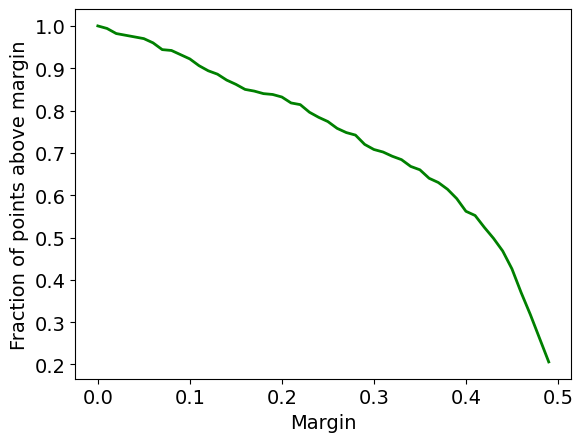

In [20]:
'''
3. Analyzing the margin-----
 
 The logistic regression model produces not just classifications but also conditional 
probability estimates. 
 We will say that "x" has margin "gamma" if (according to the logistic regression model) 
"Pr(y=1|x) > (1/2)+gamma" or "Pr(y=1|x) < (1/2)-gamma". The following function 
margin_counts takes as input as the classifier ("clf", computed earlier), the test set 
("test_data"), and a value of "gamma", and computes how many points in the test set have 
margin of at least "gamma
'''
# Return number of test points for which Pr(y=1) lies in [0, 0.5 - gamma) or (0.5 + gamma, 1]


def margin_counts(clf, test_data, gamma):
# Compute probability on each test point
   preds = clf.predict_proba(test_data)[:, 1]
# Find data points for which prediction is at least gamma away from 0.5
   margin_inds = np.where((preds > (0.5 + gamma)) | (preds < (0.5-gamma)))[0]
   return float(len(margin_inds))

# Let us visualize the test set's distribution of margin values.
gammas = np.arange(0, 0.5, 0.01)
f = np.vectorize(lambda g: margin_counts(clf, test_data, g))
plt.plot(gammas, f(gammas) / 500.0, linewidth=2, color='green')
plt.xlabel('Margin', fontsize=14)
plt.ylabel('Fraction of points above margin', fontsize=14)
plt.show()

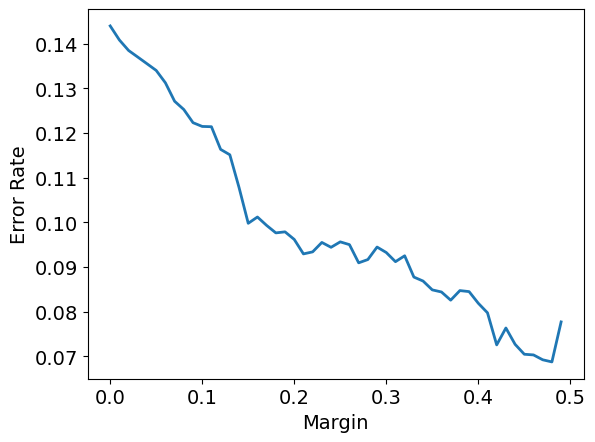

In [22]:
'''
We investigate a natural question: 
"Are points "x" with larger margin more likely to be classified correctly? 
To address this, we define a function margin_errors that computes the fraction of points with margin at least "gamma" 
that are misclassified. 
Return error of predictions that lie in intervals [0, 0.5 - gamma) and (0.5 + gamma, 1] 
'''
def margin_errors(clf, test_data, test_labels, gamma):
    # Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1]
    # Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5 - gamma)))[0]
    # Compute error on those data points.
    num_errors = np.sum((preds[margin_inds] > 0.5) != (test_labels[margin_inds] > 0.0))
    return float(num_errors)/len(margin_inds)
#Let us visualize the relationship between margin and error rate.
#Create grid of gamma values
gammas=  np.arange(0,0.5,0.01)
#Compute margin _errors on test data for each value of g
f = np.vectorize(lambda g: margin_errors(clf,test_data,test_labels,g))
#Plot the result
plt.plot(gammas,f(gammas),linewidth=2)
plt.ylabel('Error Rate', fontsize= 14)
plt.xlabel('Margin',fontsize=14)
plt.show()

In [24]:
'''
4. Words with large influence 
 Finally, we attempt to partially interpret the logistic regression model. 
 Which words are most important in deciding whether a sentence is positive? As a first approximation 
to this, we simply take the words whose coefficients in "w" have the largest positive values. 
 Likewise, we look at the words whose coefficients in "w" have the most negative values, and we 
think of these as influential in negative predictions.
'''
# Convert vocabulary into a list:
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])])
# Get indices of sorting w
inds = np.argsort(w)
# Words with large negative values
neg_inds = inds[0:50]
print("Highly negative words: ")
print([str(x) for x in list(vocab[neg_inds])])
# Words with large positive values
pos_inds = inds[-49:-1]
print("Highly positive words: ")
print([str(x) for x in list(vocab[pos_inds])])

Highly negative words: 
['disappointment', 'poor', 'waste', 'bad', 'aren', 'worst', 'not', 'disappointing', 'unfortunately', 'sucked', 'doesn', 'wasn', 'stupid', 'return', 'average', 'avoid', 'fails', 'slow', 'sucks', 'bland', 'rude', 'lacks', 'then', 'didn', 'make', 'horrible', 'lame', 'started', 'guess', 'walked', 'awful', 'starter', 'torture', 'nothing', 'sorry', 'dirty', 'failed', 'mediocre', 'hours', 'hated', 'garbage', 'dont', 'terrible', 'appalling', 'worse', 'difficult', 'directing', 'unreliable', 'zero', 'pay']
Highly positive words: 
['recommendation', 'dialing', 'years', 'easy', 'fast', 'until', 'to', 'need', 'score', 'definitely', 'complaints', 'funny', 'plus', 'pleased', 'carry', 'both', 'brilliant', 'friendly', 'rocks', 'incredible', 'happy', 'good', 'joy', 'soundtrack', 'wow', 'best', 'cool', 'wonderful', 'interesting', 'comfortable', 'enjoyed', 'amazing', 'works', 'fantastic', 'excellent', 'beautiful', 'happier', 'masculine', 'screamy', 'liked', 'fun', 'delicious', 'lov

In [26]:
#Calculate the Model Accuracy , MAE, MSE , RMSE and R SQUARE SCORE-----
from sklearn import metrics

#Fit logistic classifier on training data:
clf = SGDClassifier(loss="log_loss")
clf.fit(train_data, train_labels)

#Get predictions on test data
preds_test = clf.predict(test_data)

accuracy = metrics.accuracy_score(test_labels, preds_test)
print("Accuracy Score: ", accuracy)

mae = metrics.mean_absolute_error(test_labels, preds_test)
print("Mean Absolute Error = ", mae)

mse = metrics.mean_squared_error(test_labels, preds_test)
print("Mean Squared Error: ", mse)

rmse = mse ** 0.5
print("Root Mean Squared Error: ", rmse)

print("R Square Score: ", metrics.r2_score(test_labels, preds_test))


Accuracy Score:  0.856
Mean Absolute Error =  0.288
Mean Squared Error:  0.576
Root Mean Squared Error:  0.758946638440411
R Square Score:  0.42400000000000004
